In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

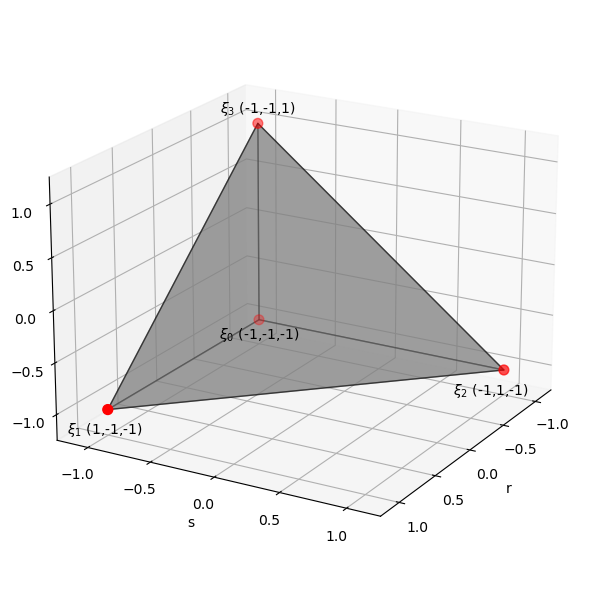

In [66]:
# 定义四面体的四个顶点
vertices = np.array([
    [-1, -1, -1],  # 顶点 0
    [1, -1, -1],    # 顶点 1
    [-1, 1, -1],    # 顶点 2
    [-1, -1, 1]     # 顶点 3
])

# 定义四面体的四个面（每个面由三个顶点组成）
faces = [
    [vertices[0], vertices[1], vertices[2]],  # 底面
    [vertices[0], vertices[1], vertices[3]],  # 面 1
    [vertices[0], vertices[2], vertices[3]],  # 面 2
    [vertices[1], vertices[2], vertices[3]]   # 面 3
]

# 创建 3D 图形
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# 绘制四面体的面
ax.add_collection3d(Poly3DCollection(faces, alpha=0.5, linewidths=1, edgecolor='k', facecolor='gray'))

# 绘制顶点
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='r', s = 50, label='Vertices')

# 标注顶点
# for i, vertex in enumerate(vertices):
#     ax.text(vertex[0], vertex[1], vertex[2], f'V{i}', color='black', fontsize = 12)
# 标注顶点（调整位置避免遮挡）
vertex_labels = [r'$\xi_0$ (-1,-1,-1)', r'$\xi_1$ (1,-1,-1)', r'$\xi_2$ (-1,1,-1)', r'$\xi_3$ (-1,-1,1)']
offset = 0.1  # 标签偏移量
for i, (x, y, z) in enumerate(vertices):
    # 根据顶点位置动态调整标签位置
    if i == 0:  # V0 向下偏移
        ax.text(x, y, z - offset*2, vertex_labels[i], 
                color='black', fontsize=10, ha='center')
    elif i == 1:  # V1 向右偏移
        ax.text(x + offset * 2, y - offset * 2, z - offset*2, vertex_labels[i], 
                color='black', fontsize=10, ha='left')
    elif i == 2:  # V2 向左偏移
        ax.text(x, y + offset * 2, z - offset*2, vertex_labels[i], 
                color='black', fontsize=10, ha='right')
    else:  # V3 向上偏移
        ax.text(x, y, z + offset, vertex_labels[i], 
                color='black', fontsize=10, ha='center')

# 设置坐标轴标签和范围
ax.set_xlabel('r')
ax.set_ylabel('s')
ax.set_zlabel('t')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])

# 设置视角以便更好地观察
ax.view_init(elev=20, azim=30)

# plt.title('Reference Tetrahedron Defined by:\n'
#           r'$r, s, t \geq 0$ and $r + s + t \leq 1$', pad=20)
# plt.legend(loc='lower right')

plt.tight_layout()
plt.savefig('RefTetrahedron.png', dpi=300, bbox_inches='tight')
plt.show()